<a href="https://colab.research.google.com/github/padmapalle/dev-handling-missing-values/blob/main/DEV_AAT_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Data = pd.read_csv("/content/train.csv")


In [ ]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
DataFrame = Data.copy()

In [ ]:
len(DataFrame['Cabin'].unique())

148

In [ ]:
len(DataFrame['Embarked'].unique())

4

In [ ]:
print("Number of Categories in: ")
for ColName in DataFrame[['Embarked','Cabin']]:
    print("{} = {}".format(ColName, len(DataFrame[ColName].unique())))

Number of Categories in: 
Embarked = 4
Cabin = 148


<Axes: >

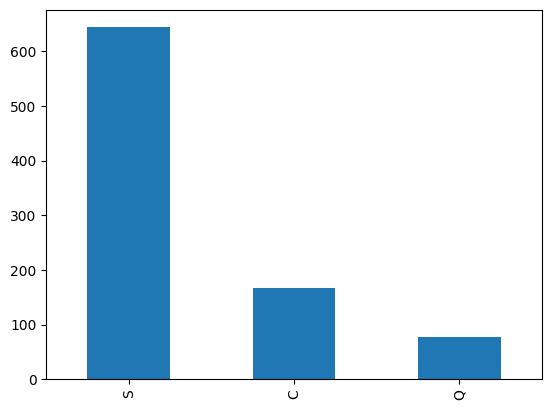

In [ ]:
DataFrame['Embarked'].value_counts().plot.bar()

<Axes: >

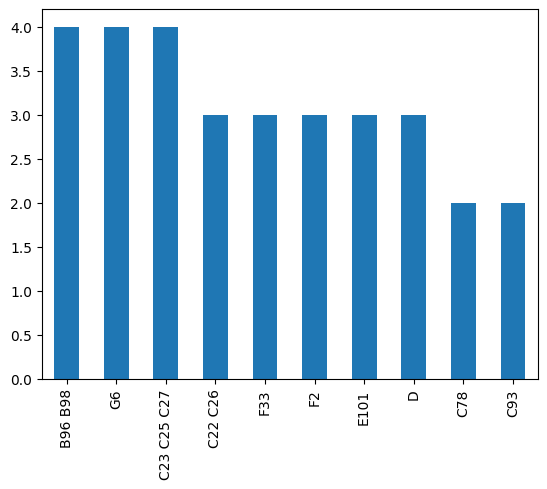

In [ ]:
DataFrame['Cabin'].value_counts().head(10).plot.bar()

In [ ]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]
    # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [ ]:
for Columns in ['Embarked','Cabin']:
    impute_nan_most_frequent_category(DataFrame,Columns)

DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Cabin_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S,B96 B98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S,B96 B98
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S,B96 B98


In [ ]:
DataFrame[['Embarked','Embarked_Imputed','Cabin','Cabin_Imputed']].head(10)

,Embarked,Embarked_Imputed,Cabin,Cabin_Imputed
0,S,S,NaN,B96 B98
1,C,C,C85,C85
2,S,S,NaN,B96 B98
3,S,S,C123,C123
4,S,S,NaN,B96 B98
5,Q,Q,NaN,B96 B98
6,S,S,E46,E46
7,S,S,NaN,B96 B98
8,S,S,NaN,B96 B98
9,C,C,NaN,B96 B98


In [ ]:
DataFrame = DataFrame.drop(['Embarked','Cabin'], axis = 1)

In [ ]:
DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Imputed,Cabin_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,B96 B98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,B96 B98
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,B96 B98
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,B96 B98
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,B96 B98
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C148


In [ ]:
DataFrame = Data.copy()

In [ ]:
DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Function to impute most occured category and add importance vairable

def impute_nan_add_vairable(DataFrame,ColName):
    # Create new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"]=np.where(DataFrame[ColName].isnull(),1,0)

    #Take most frequent occured category in that vairable (.mode())
    Mode_Category = DataFrame[ColName].mode()[0]

    #Replace NAN values with most occured category in actual vairable
    DataFrame[ColName].fillna(Mode_Category,inplace=True)

In [ ]:
for Columns in ['Embarked','Cabin']:
    impute_nan_add_vairable(DataFrame,Columns)

DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Cabin_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,1


In [ ]:
DataFrame[['Embarked','Embarked_Imputed','Cabin','Cabin_Imputed']].head(10)

,Embarked,Embarked_Imputed,Cabin,Cabin_Imputed
0,S,0,B96 B98,1
1,C,0,C85,0
2,S,0,B96 B98,1
3,S,0,C123,0
4,S,0,B96 B98,1
5,Q,0,B96 B98,1
6,S,0,E46,0
7,S,0,B96 B98,1
8,S,0,B96 B98,1
9,C,0,B96 B98,1


In [ ]:
DataFrame = Data.copy()

In [ ]:
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
    DataFrame[ColName]=np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

In [ ]:
## Call function to create new category for variables
for Columns in ['Embarked','Cabin']:
    impute_nan_create_category(DataFrame,Columns)

In [ ]:
#2. Display result
DataFrame[['Embarked','Cabin']].head(10)

,Embarked,Cabin
0,S,Unknown
1,C,C85
2,S,Unknown
3,S,C123
4,S,Unknown
5,Q,Unknown
6,S,E46
7,S,Unknown
8,S,Unknown
9,C,Unknown


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/train.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_data = encoder.fit_transform(data[['Sex', 'Embarked']])
encoded_feature_names = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
data.drop(columns=['Sex', 'Embarked'], inplace=True)
data = pd.concat([encoded_df, data], axis=1)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8379888268156425


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/train.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_data = encoder.fit_transform(data[['Sex', 'Embarked']])
encoded_feature_names = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
data.drop(columns=['Sex', 'Embarked'], inplace=True)
data = pd.concat([encoded_df, data], axis=1)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.1f}%")


Accuracy: 83.8%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
pip install xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/train.csv")

# Encode categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_data = encoder.fit_transform(data[['Sex', 'Embarked']])
encoded_feature_names = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
data.drop(columns=['Sex', 'Embarked'], inplace=True)
data = pd.concat([encoded_df, data], axis=1)

# Drop non-numeric columns
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (XGBoost Classifier)
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.1f}%")



Accuracy: 80.4%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
